<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°05



## Problema 01
<img src="https://drive.google.com/uc?export=view&id=1Ha4ZjgvrlWHQ5vV_VydBkxiFXdgDn8TT" width = "200" align="center"/>


El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [22]:
# librerias

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [23]:
# cargar datos
data = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**:
    * Descripción: Nombre de la especie de Iris.
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**:
    * Descripción: largo del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**:
    * Descripción: ancho del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**:
    * Descripción: largo del pétalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**:
    * Descripción: ancho del pépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


__Comentario:__ En cada columna existe un dato nulo y los tipos de dato coinciden con las bases.

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores `nan`.

In [25]:
data['species'].value_counts()

versicolor    39
setosa        35
virginica     34
Setosa        10
virginica      6
 virginica     5
VIRGINICA      5
Versicolor     5
VERSICOLOR     5
SETOSA         5
Name: species, dtype: int64

__Comentario:__ Observamos que existe un dato nulo y que los nombres de las columnas se diferencias por mayúsculas o espacios.

In [26]:
# Corrección:
data['species'] = data['species'].str.lower().str.strip().fillna('default')

data['species'].unique()

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

In [27]:
# Reemplazamos los valores NaN por 0:
columnas = data.columns.drop('species')
data[columnas] = data[columnas].fillna(0)

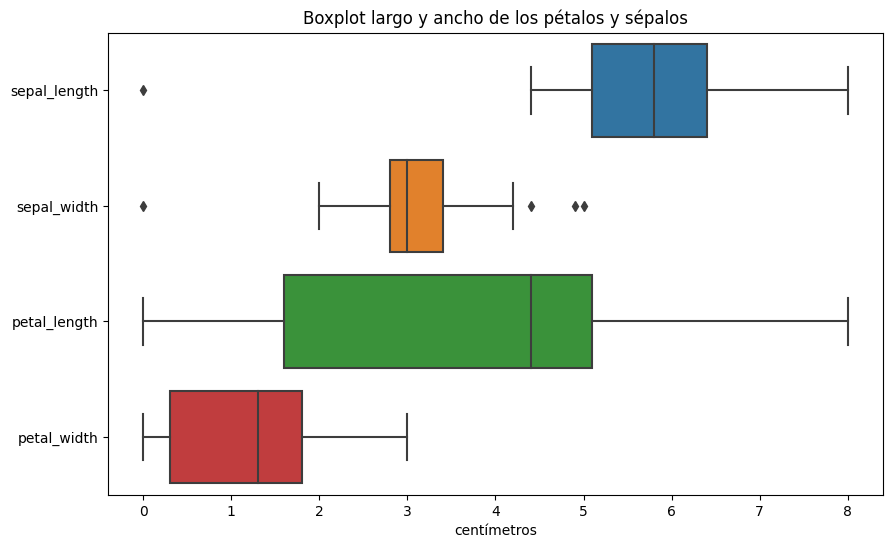

In [28]:
# Ahora sí, realizamos los gráficos boxplot:

boxplot_data = data[columnas]

plt.figure(figsize=(10, 6))
sns.boxplot(data=boxplot_data, orient = 'h')
plt.title('Boxplot largo y ancho de los pétalos y sépalos')
plt.xlabel('centímetros')
plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [29]:
# Primero, definiremos los rángos válidos:
rangos_validos = {
    'sepal_length' : (4.0, 7.0),
    'sepal_width' : (2.0, 4.5),
    'petal_length' : (1.0, 7.0),
    'petal_width' : (0.1, 2.5)
}
mask1 = (data['sepal_length'] >= 4.0) & (data['sepal_length'] <= 7.0)
mask2 = (data['sepal_width'] >= 2.0) & (data['sepal_width'] <= 4.5)
mask3 = (data['petal_length'] >= 1.0) & (data['petal_length'] <= 7.0)
mask4 = (data['petal_width'] >= 0.1) & (data['petal_width'] <= 2.5)

# Añadimos la columna 'label':
data['label'] = mask1 & mask2 & mask3 & mask4
data['label'] = data['label'].replace(True, '')
data['label'] = data['label'].replace(False, 'fuera del rango')

print('Porcentaje de datos no válidos:', 100*data['label'].value_counts()[1]/len(data))
data.head()

Porcentaje de datos no válidos: 14.0


,sepal_length,sepal_width,petal_length,petal_width,species,label
0,4.4,3.2,1.3,3.0,setosa,fuera del rango
1,7.2,3.6,6.1,2.5,virginica,fuera del rango
2,6.3,3.3,6.0,2.5,virginica,
3,6.7,3.3,5.7,2.5,virginica,
4,6.3,3.4,5.6,2.4,virginica,


4. Realice un gráfico de *sepal_length* vs *petal_length* y otro de *sepal_width* vs *petal_width* categorizados por la etiqueta **label**. Concluya sus resultados.

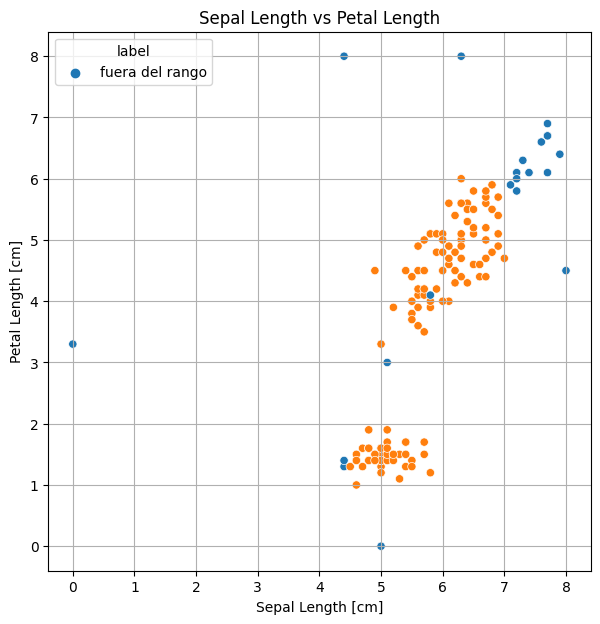

In [30]:
# Gráfico sepal_length vs petal_length:
plt.figure(figsize = (7,7))
sns.scatterplot(
    data = data,
    x = 'sepal_length',
    y = 'petal_length',
    hue = 'label'
)
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.grid()
plt.show()

__Comentario:__ Se diferencian dos zonas donde se concentra la muestra válida. La primera zona es en el rectángulo [4.0, 6.0]x[1.0, 2.0] [cm]x[cm] y la segunda, en [5.0, 7.0]x[3.0, 6.0] [cm]x[cm]. Los datos fuera del rango se concentran en el rectángulo [7.0, 8.0]x[6.0, 7.0] [cm]x[cm], pegados a la zona 2.

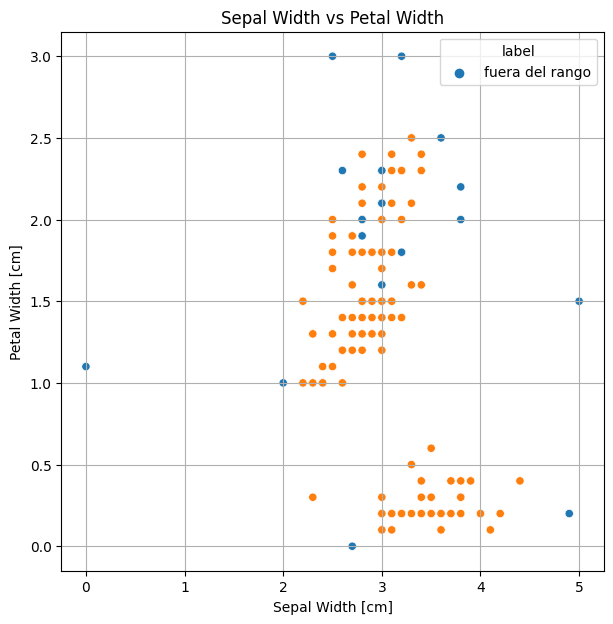

In [31]:
# Gráfico sepal_width vs petal_width:
plt.figure(figsize = (7,7))
sns.scatterplot(
    data = data,
    x = 'sepal_width',
    y = 'petal_width',
    hue = 'label'
)
plt.title('Sepal Width vs Petal Width')
plt.xlabel('Sepal Width [cm]')
plt.ylabel('Petal Width [cm]')
plt.grid()
plt.show()

__Comentario:__ También, se diferencian dos zonas donde se concentra la muestra, pero esta vez con un poco más de dispersión. La primera zona es en el rectángulo [3.0, 5.0]x[0.0, 0.5] [cm]x[cm] y la segunda, en [2.0, 4.0]x[1.0, 2.5] [cm]x[cm]. Los pares fuera de rango se encuentran más dispersos y mezclándose de la muestra válida. Significa que los datos fuera del rango están mayormente asociados al largo de los pétalos y sépalos.

5. Filtre los datos válidos y realice un gráfico de *sepal_length* vs *petal_length* categorizados por la etiqueta **species**.

In [32]:
# Quitamos los datos sin especie definida:
data_filtrado = data.copy()[(data['species'] != 'default') & (data['label'] != 'fuera del rango')]

print('Especies:', data_filtrado['species'].unique())
print('Label:', data_filtrado['label'].unique())

Especies: ['virginica' 'versicolor' 'setosa']
Label: ['']


__Comentario:__ data_filtrado satisface las bases del experimento y excluye los datos que no definen su especie.

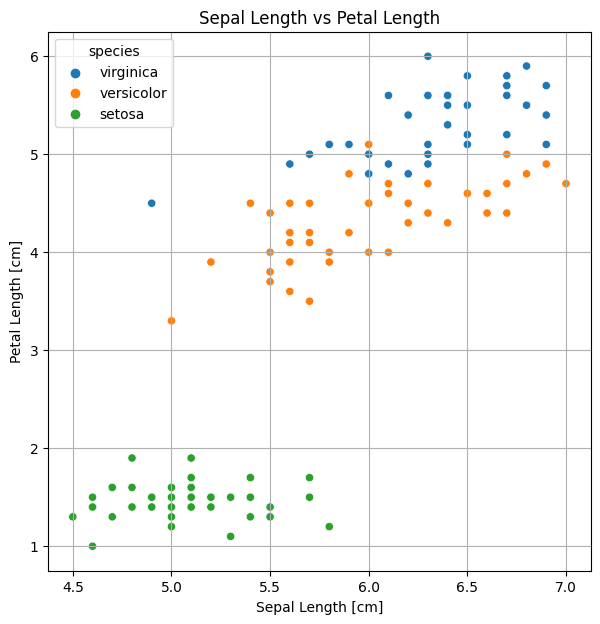

In [33]:
# Gráfico sepal_length vs petal_length:
plt.figure(figsize = (7,7))
sns.scatterplot(
    data = data_filtrado,
    x = 'sepal_length',
    y = 'petal_length',
    hue = 'species'
)
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.grid()
plt.show()

__Comentario:__

Se observa que la zona 1 (descrita en el primer gráfico) está asociada a la especie 'setosa'. Adicionalmente, en la zona 2 se separan dos especies, en la mitad superior se identifica flores tipo 'virginica' y la mitad inferior, del tipo 'versicolor'. Esto es información muy útil si se deseara predecir la especie de esta clase de flores en base al largo de sus pétalos y sépalos.